In [1]:
from PQC import *

In [2]:
def circ19():
    pqc = PQC("circ19",4)
    for i in range(4):
        pqc.add('rx',o=i)
    for i in range(4):
        pqc.add('rz',o=i)
    for i in range(3):
        pqc.add('crx',c=i,o=i+1)
    pqc.add('crx',c=3,o=0);
    return pqc

In [3]:
def test():
    pqc = PQC("test",2)
    pqc.add('rx',o=1)
    return pqc

100 

200 

300 

400 

500 

600 

700 

800 

900 



0.48724188931859685

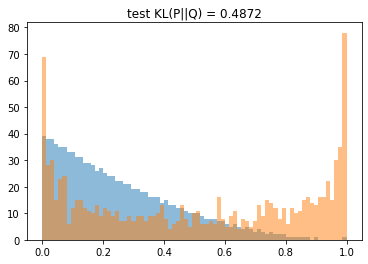

In [5]:
def expressibility(pqc, reps, param_num=12):
    arr = [];
    for i in range(reps):
        v1 = pqc.get(2*np.pi*np.random.uniform(size=(param_num,))).getH();
        v2 = pqc.get(2*np.pi*np.random.uniform(size=(param_num,)));
        fid = np.abs(v1*v2)**2;
        arr.append(fid[0,0]);
        if i%100==0 and i!=0:
            print(i,"\n");
    haar = [];
    h = Haar_dist(a=0,b=1,name="haar");
    for i in range(reps):
        haar.append(h.ppf((i+1)/reps,pqc.num));
    n_bins = 75;
    haar_pdf = plt.hist(np.array(haar), bins=n_bins, alpha=0.5,range=(0,1))[0]/reps; 
    pqc_pdf = plt.hist(np.array(arr), bins=n_bins, alpha=0.5, range=(0,1))[0]/reps;
    kl = kl_divergence(pqc_pdf,haar_pdf);
    plt.title("%s KL(P||Q) = %1.4f" % (pqc.name, kl))
    return kl;

pqc = test()
expressibility(pqc,1000,1)

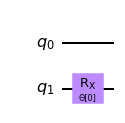

In [6]:
pqc.circ.draw('mpl')

# expressibility test

100 

200 

300 

400 



0.054299477362805465

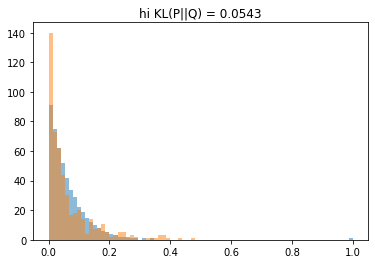

# entangling capability 계산

In [6]:
entangling_capability(pqc, 1000)

100 

200 

300 

400 

500 

600 

700 

800 

900 



0.4169896770904346